# K-Means

<br> 

Throughout this notebook, the K-Means model will be implemented on both the Original Zero and Nonzero Datasets. These datasets have been merely normalised and standardised and the relevant features have been selected. <br><br>
This shall act as an initial test to identify both the best category of models (i.e. K-Means, HAC, K-Medoids, DBSCAN and Fuzzy C-Means) and the best distance metrics (i.e. Euclidean, Manhattan, Minkowski, Gower and Cosine). <br><br>
N.B. Only the best models and their resepctive best performing distance metrics shall be utilised in later dimensionally reducted datasets.

## <u> Table of Contents </u>
* [Import the DataSet](#1)
* [Modelling Zero Data](#22.3)
    * [Elbow & Silhoutte: Zero](#23)
    * [Modelling Original](#23.1)
        * [Zero: K-Means](#M1)
        * [Zero Visualisation](#N00)
* [Modelling Nonzero Data](#MU)
    * [Elbow & Silhoutte: Nonzero](#NN)
        * [Nonzero: K-Means](#M6)
        * [Nonzero Visualisation](#N0)

<br>

## Import the DataSet  <a class="anchor" id="1"></a>

In [1]:
#!pip install plotly
#!pip install joypy
#!pip install pyvis
#!pip install prince
#!pip install pyclustering
#!pip install clusteval
#!pip install kmodes
#!pip install gower
#!pip install scikit-learn-extra
#!pip install minisom
#!pip install fuzzy-c-means

In [2]:
# Remove the warnings

import warnings; warnings.simplefilter('ignore')

# Basic Packages

import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save

# Set a random state 

np.random.seed(9)

# Notebook Setup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
pd.set_option('display.max_columns', None)

# Plotting Packages

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.widgets import SpanSelector
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from joypy import joyplot
from pyvis.network import Network
from IPython.display import Image
import plotly.offline as pyo
from yellowbrick.cluster import KElbowVisualizer

# Set notebook mode to work in offline

pyo.init_notebook_mode()

# Packages for Transformations

import scipy.special
import prince
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Packages for Clustering

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from clusteval import clusteval
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering 
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from fcmeans import FCM

# Packages to measure performance

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance as ssd
from pyclustering.cluster.kmedoids import kmedoids

In [3]:
# Import the zero dataset and remove unwanted columns

final_zero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\final_zero.csv')
final_zero.drop(columns=['Unnamed: 0'], inplace=True)
tra_zero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\tra_zero.csv')
tra_zero.drop(columns=['Unnamed: 0'], inplace=True)
zero_df = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\zero_df.csv')
zero_df.drop(columns=['Unnamed: 0'], inplace=True)

# Import the nonzero dataset and remove unwanted columns

final_nonzero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\final_nonzero.csv')
final_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
tra_nonzero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\tra_nonzero.csv')
tra_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
nonzero_df = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\nonzero_df.csv')
nonzero_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# check if the finalzero dataset is correct

final_zero.head(1)

volume_firm  liabilities_firm  bank_liabilities  other_liabilities  \
0    -0.919737         -1.221589          -1.39815          -0.213653   

         pl  banking_products  new_active_cc  new_passive_cc  \
0 -0.611916         -0.341303      -0.432425        -0.13513   

   new_commission_income  legal  p_membership  p_KK  p_fixeddeposits  \
0              -0.181772   16.0           1.0   1.0              1.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_unionfunds  \
0                  0.0                 0.0   0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank   work  year  risk  \
0                0.0         0.0          0.0         0.0  208.0  13.0   1.0   

   postcode  
0      32.0

In [5]:
# check if the transformed zero dataset is correct

tra_zero.head(1)

client_type  legal  branch  volume_firm  liabilities_firm  liabilities  \
0          0.0   16.0    10.0    10.103612          9.181565          0.0   

   bank_liabilities  other_liabilities    pl_firm         pl  \
0               0.0         -11.512925  12.735183  14.697371   

   banking_products  other_products  p_membership  p_KK  p_creditcard  \
0               0.0             0.0           1.0   1.0           0.0   

   p_bankloans  p_fixeddeposits  p_WP2Depot  p_propertyinsurance  \
0          1.0              1.0         0.0                  0.0   

   p_companyinsurance  p_DZ  p_DZP  p_unionfunds  p_buildingsavings  \
0                 0.0   0.0    0.0           0.0                0.0   

   p_mortgage  p_VRleasing  p_teambank  new_active_cc  new_passive_cc  \
0         0.0          0.0         0.0           -0.0        0.050022   

   new_commission_income  new_cmib   work  year  risk  postcode  size  
0              26.431755  3.856511  208.0  13.0   1.0      32.0   1.0

In [6]:
# check if the original zero dataset is correct

zero_df.head(1)

client_type  legal  branch  volume_firm  volume  loans_approved  \
0          0.0   16.0    10.0     31792.82     0.0             0.0   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0             0.0           6103.29          0.0               0.0   

   other_liabilities   pl_firm         pl  banking_products  other_products  \
0                0.0  47870.67  11518.478               0.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           1.0   1.0           0.0          1.0              1.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0            0.0   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0            0.05                  47.25      47.3  208.0  13.0   1.0   

   postcode  size  
0      32.0   1.0

In [7]:
# check if the final nonzero dataset is correct

final_nonzero.head(1)

loans_approved  bank_liabilities  other_liabilities        pl  \
0       -0.428154          -0.57338          -0.426741 -1.530136   

   banking_products  new_active_cc  new_commission_income  client_type  legal  \
0         -0.458714       0.300147              -0.464326          0.0   39.0   

   p_membership  p_KK  p_creditcard  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_mortgage  p_VRleasing  \
0                  0.0                 0.0   0.0         0.0          0.0   

   p_teambank   work  year  risk  postcode  
0         0.0  393.0  11.0   0.0      46.0

In [8]:
# check if the transformed nonzero dataset is correct

tra_nonzero.head(1)

client_type  legal  branch  volume_firm    volume  loans_approved  \
0          0.0   39.0    23.0     8.333568  7.697297         9.93363   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0       10.883836          7.523551    10.231201           9.80453   

   other_liabilities   pl_firm        pl  banking_products  other_products  \
0               -0.0  7.444261  9.518547               2.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0          1.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0       5.180153   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0          2.5096              13.890309  5.466413  393.0  11.0   0.0   

   postcode  size  
0      46.0   1.0

In [9]:
# check if the original nonzero dataset is correct

nonzero_df.head(1)

client_type  legal  branch  volume_firm    volume  loans_approved  \
0          0.0   39.0    23.0     12988.79  12988.79        12988.79   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0        12988.79            748.17       748.17            748.17   

   other_liabilities  pl_firm       pl  banking_products  other_products  \
0                0.0  7388.77  7388.77               2.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0          1.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0         177.71   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0            12.3                   46.6    236.61  393.0  11.0   0.0   

   postcode  size  
0      46.0   1.0

## Model Definition

K-Means merely allows to adopt a Euclidean distance. As a result this is the only distance that will be tested. <br>

In [10]:
# We define the model and set the parameters to evaluate the GOF

ce_kmeans = clusteval(cluster='kmeans', evaluate='silhouette', max_clust=20)

<br>

## Modelling Zero Data  <a class="anchor" id="22.3"></a>

<br>

## Elbow & Silhoutte: Zero  <a class="anchor" id="23"></a>

For the visualisations we use a package called clusteval which easily computes and depicts the measurements of goodness of fit (GOF).
<br>

**Zero Data-Set**

In [11]:
# we create an array based on the dataset

numpy_arr_1 = final_zero.to_numpy()


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|███████████████████████████████████████████████████████| 18/18 [00:39<00:00,  2.19s/it]


[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


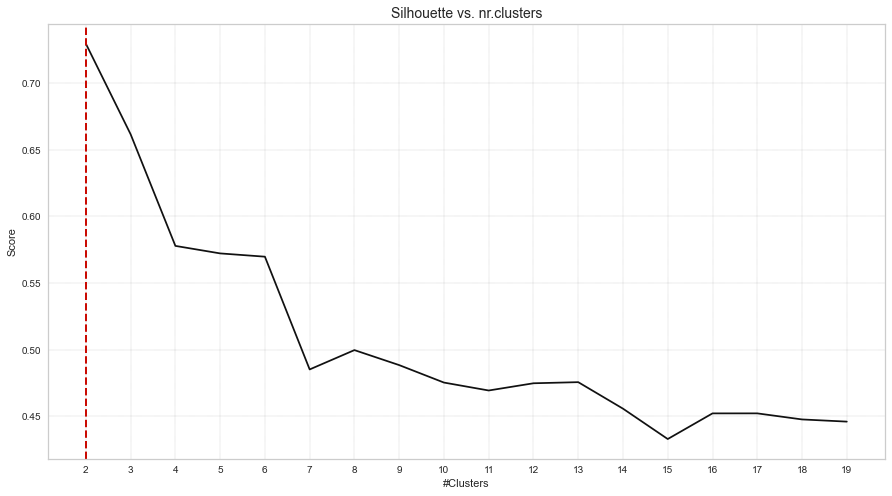

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [12]:
# Fit the array to find optimal number of clusters

ce_kmeans.fit(numpy_arr_1)

# Make plot of the silhouette

ce_kmeans.plot()

<br><br>
Furthermore we also adopt another package (i.e. KElbowVisualizer). This allows to test the Elbow once again and visualise the amount of time taken to compute the clusters. <br> <br>

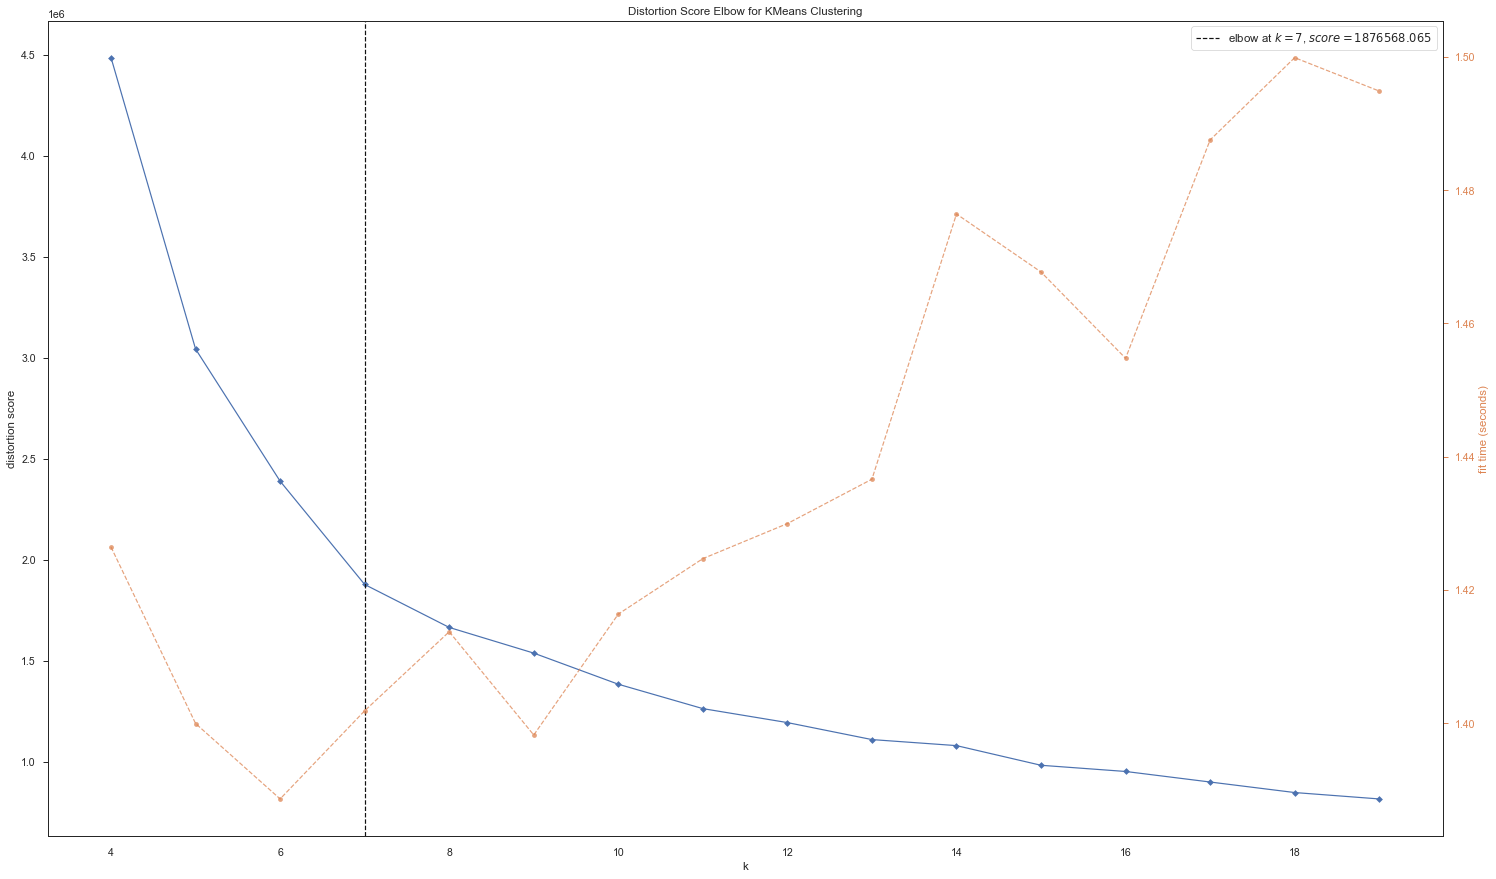

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# set the basic format (i.e. the palette for the color and the backgrounds)

sns.set(rc={'axes.facecolor':'white'})
sns.set_context("paper", font_scale = 1.2)
sns.set_style("white")

# set the size of the plot

fig, ax = plt.subplots(figsize=(25,15))

# We use the Elbow method
elb = KElbowVisualizer(KMeans(), k=(4,20), color=['#002034', "#82ceff"])
elb.fit(final_zero)        
elb.show()

## Modeling Original  <a class="anchor" id="23.1"></a>

###  Zero

#### K-Means <a class="anchor" id="M1"></a>

Given that the clustering evaluation methods produced two results, both will be tested. <br>

In [14]:
# we define the function for K-Means

k_model_zero = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000, 
                 n_clusters=6, n_init=50, random_state=9, tol=0.0001, verbose=0)

k_model_zero_7 = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000, 
                 n_clusters=7, n_init=50, random_state=9, tol=0.0001, verbose=0)

# Fit the function to the original zero dataset

k_model_zero.fit(final_zero)
k_model_zero.cluster_centers_

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero["Cluster_k"] = k_model_zero.labels_
tra_zero["Cluster_k"] = k_model_zero.labels_

zero_df["Cluster_k"] = k_model_zero.labels_
print('Distribution of Clusters: \n')
print(zero_df['Cluster_k'].value_counts())
print('\n')

# Fit the function to the original zero dataset

k_model_zero_7.fit(final_zero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero["Cluster_k7"] = k_model_zero_7.labels_
tra_zero["Cluster_k7"] = k_model_zero_7.labels_

zero_df["Cluster_k7"] = k_model_zero_7.labels_
print('Distribution of Clusters: \n')
print(zero_df['Cluster_k7'].value_counts())

Distribution of Clusters: 

1    3056
4     621
0     536
5     469
2     328
3     176
Name: Cluster_k, dtype: int64


Distribution of Clusters: 

5    1982
0    1107
3     620
4     507
2     466
6     328
1     176
Name: Cluster_k7, dtype: int64


In [15]:
print('The performance scores are the following: \n' )
print('Six Clusters')
print('Silhouette: ' + str(silhouette_score(final_zero, final_zero["Cluster_k"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_zero, final_zero["Cluster_k"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_zero, final_zero["Cluster_k"])))
print('\n')
print('Seven Clusters')
print('Silhouette: ' + str(silhouette_score(final_zero, final_zero["Cluster_k7"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_zero, final_zero["Cluster_k7"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_zero, final_zero["Cluster_k7"])))

The performance scores are the following: 

Six Clusters
Silhouette: 0.5689753997763245
Calinski Harabasz: 23251.018019459287
Davies Bouldin: 0.6032563327884375


Seven Clusters
Silhouette: 0.489662521797062
Calinski Harabasz: 25078.29967623434
Davies Bouldin: 0.697278296697357


###  Zero Visualisation <a class="anchor" id="N00"></a>

We now visualise the clusters. <br>

In [16]:
#PCA with two components

pca_2d = PCA(n_components=2)

#PCA with three components

pca_3d = PCA(n_components=3)

In [17]:
# we remove the clusters from a new dataset

tt = tra_zero.drop(columns=['Cluster_k'])

# we create two dfs, one for 2 components and one for 3

PCs_2d = pd.DataFrame(pca_2d.fit_transform(tt))
PCs_3d = pd.DataFrame(pca_3d.fit_transform(tt))


# PC1_2d: The first component. PC2_2d: The second component, etc-

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

# we create a new df

tra_zero1 = tra_zero.copy()

# we concatonate all dfs together to then derive visuals

tra_zero1 = pd.concat([tra_zero1,PCs_2d,PCs_3d], axis=1, join='inner')

In [18]:
# we create a new variable for each cluster in the dataset so we create two empty lists

cluster = []
idd = []

# we then create a loop to iterate through the values

for i in tra_zero1["Cluster_k"].value_counts().index:
    n = i
    id_ = 'cluster_' + str(n) # for each id we create a new variable
    m = str(id_) +  ' = ' + 'tra_zero1[tra_zero1["Cluster_k"] == ' + str(n) + ']' # we then define the variable 
    idd.append(id_) # we append its id to the list
    cluster.append(m) # we append the variable to the list

# we then create a loop to execute all of the new variables created
    
for i in cluster:
    exec(i)

    
# we create two new lists, one to contain the different PCA plots, the other to store the trace (i.e. id of the plot)
    
nn = []
l = []    
for i in idd:
    b = 'trace' + i 
    p = 'go.Scatter(x =' + i + '["PC1_2d"], y =' + i + '["PC2_2d"], mode = "markers", text = None)'
    l.append(b)
    nn.append(p)
    
# we create a dictionary to ensure that all traces are correctly defined  
    
commands = {}
for a,b in zip(nn,l):
    key=str(b)
    commands[key]=a

# we execute the dictionary and create the individual plots  
    
for key, value in commands.items():
    exec (f'{key}={value}')            
   

In [19]:
# we retrieve all the new features

for i in l:
    print(i)

tracecluster_1
tracecluster_4
tracecluster_0
tracecluster_5
tracecluster_2
tracecluster_3


In [20]:
# we set a title for the graph

title = "Visualizing Clusters in Two Dimensions Using PCA"


# we set an appropriate layout 

layout = dict(title = title,
              xaxis= dict(title= 'P1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'P2',ticklen= 5,zeroline= False)
             )

# we zip all the traces to create one figure

fig = go.Figure(dict(data = [tracecluster_1,
tracecluster_4,
tracecluster_0,
tracecluster_5,
tracecluster_2,
tracecluster_3]), layout = layout)

pyo.iplot(fig)

# we save the dataset
    
fig.write_image("Kmeans_orig_2_Z.png", scale=2)

In [21]:
nn = []
l = []    
for i in idd:
    b = 'trace' + i 
    p = 'go.Scatter3d(x =' + i + '["PC1_2d"], y =' + i + '["PC2_2d"], z =' + i + '["PC3_3d"], mode = "markers", text = None)'
    l.append(b)
    nn.append(p)
    
commands = {}
for a,b in zip(nn,l):
    key=str(b)
    commands[key]=a
            
for key, value in commands.items():
    exec (f'{key}={value}')     

In [22]:
for i in l:
    print(i)

tracecluster_1
tracecluster_4
tracecluster_0
tracecluster_5
tracecluster_2
tracecluster_3


In [23]:
# we set a title for the graph

title = "Visualizing Clusters in Three Dimensions Using PCA"


# we set an appropriate layout 

layout = dict(title = title,
              xaxis= dict(title= 'P1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'P2',ticklen= 5,zeroline= False)
             )

# we zip all the traces to create one figure

fig = go.Figure(dict(data = [tracecluster_1,
tracecluster_4,
tracecluster_0,
tracecluster_5,
tracecluster_2,
tracecluster_3]), layout = layout)

pyo.iplot(fig)

# we save the dataset

fig.write_image("Kmeans_orig_3_Z.png", scale=2)

##  Modelling Nonzero Data<a class="anchor" id="MU"></a>

###  Elbow and Silhouette: Non-Zero <a class="anchor" id="NN"></a>

Once again, K-Means only accepts Euclidean distance. As a result this is the only distance that shall be applied. <br>

In [24]:
# we create an array based on the dataset

numpy_arr_2 = final_nonzero.to_numpy()


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|███████████████████████████████████████████████████████| 18/18 [01:25<00:00,  4.77s/it]


[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


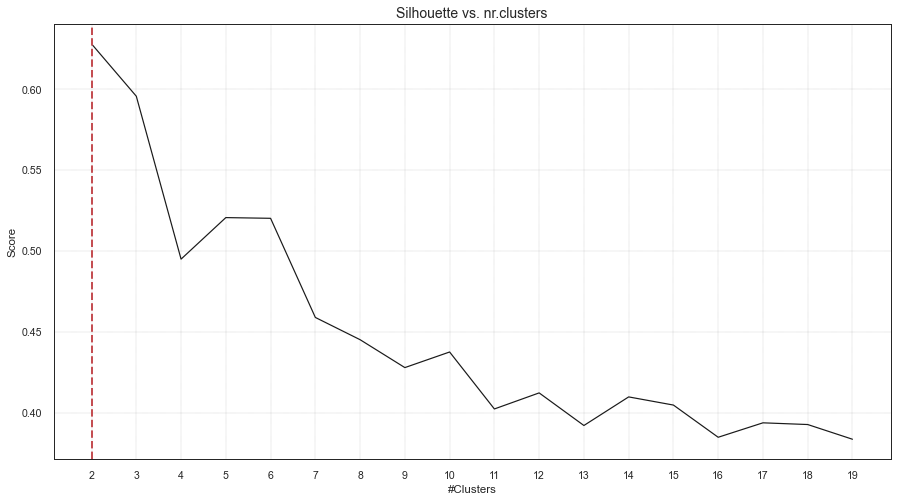

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [25]:
# Fit the array to find optimal number of clusters

ce_kmeans.fit(numpy_arr_2)

# Make plot of the silhouette

ce_kmeans.plot()

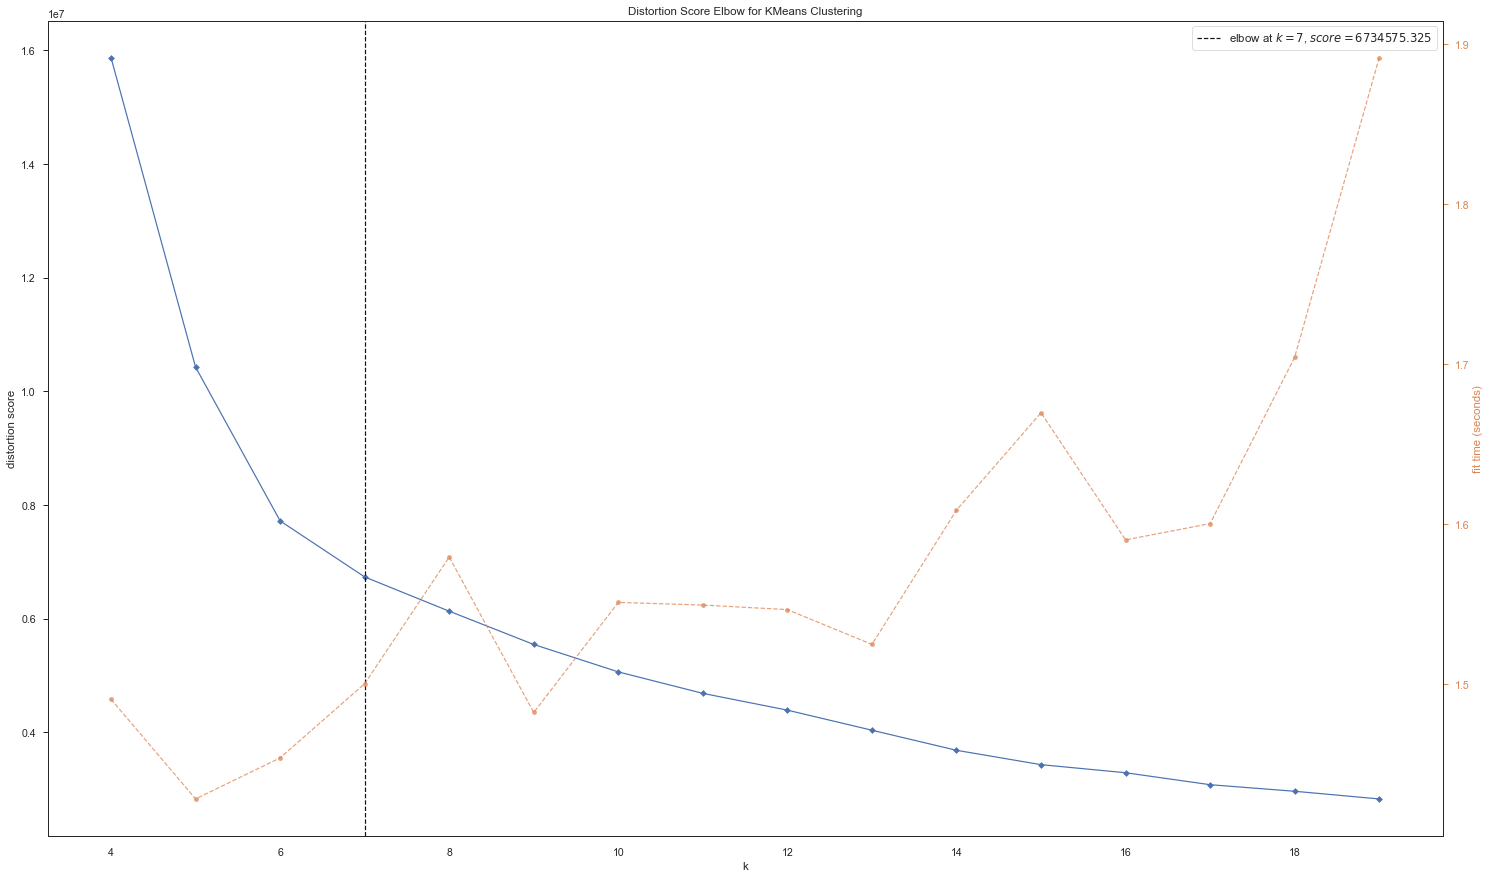

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# set the basic format (i.e. the palette for the color and the backgrounds)
sns.set(rc={'axes.facecolor':'white'})
sns.set_context("paper", font_scale = 1.2)
sns.set_style("white")

# set the size of the plot
fig, ax = plt.subplots(figsize=(25,15))

# Elboe method utilising a different package
elb = KElbowVisualizer(KMeans(), k=(4,20), color=['#002034', "#82ceff"])
elb.fit(final_nonzero)        
elb.show()

#### K-Means <a class="anchor" id="M6"></a>

Given that the different cluster evaluation methods produced two results, both will be tested. <br>

In [27]:
# we set the function for K-Means

k_model_nonzero = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000, 
                 n_clusters=6, n_init=50, random_state=9, tol=0.0001, verbose=0)

k_model_nonzero7 = KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=1000, 
                 n_clusters=7, n_init=50, random_state=9, tol=0.0001, verbose=0)

# Fit the function to the original nonzero dataset

k_model_nonzero.fit(final_nonzero)
k_model_nonzero.cluster_centers_

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero["Cluster_k"] = k_model_nonzero.labels_
tra_nonzero["Cluster_k"] = k_model_nonzero.labels_

nonzero_df["Cluster_k"] = k_model_nonzero.labels_
print('Distribution of Clusters: \n')
print(nonzero_df['Cluster_k'].value_counts())
print('\n')

# Fit the function to the original nonzero dataset

k_model_nonzero7.fit(final_nonzero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero["Cluster_k7"] = k_model_nonzero7.labels_
tra_nonzero["Cluster_k7"] = k_model_nonzero7.labels_

nonzero_df["Cluster_k7"] = k_model_nonzero7.labels_
print('Distribution of Clusters: \n')
print(nonzero_df['Cluster_k7'].value_counts())

Distribution of Clusters: 

0    4483
3    2892
2    2252
4    2246
1    1163
5     771
Name: Cluster_k, dtype: int64


Distribution of Clusters: 

0    2878
6    2633
2    2236
4    2089
3    2037
5    1163
1     771
Name: Cluster_k7, dtype: int64


In [28]:
print('The performance scores are the following: \n' )
print('Six Clusters')
print('Silhouette: ' + str(silhouette_score(final_nonzero, final_nonzero["Cluster_k"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_k"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_k"])))
print('\n')
print('Seven Clusters')
print('Silhouette: ' + str(silhouette_score(final_nonzero, final_nonzero["Cluster_k7"])))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_k7"])))
print('Davies Bouldin: ' + str(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_k7"])))

The performance scores are the following: 

Six Clusters
Silhouette: 0.5218857252340414
Calinski Harabasz: 63894.16564005964
Davies Bouldin: 0.6205469393580952


Seven Clusters
Silhouette: 0.46151970599062586
Calinski Harabasz: 61540.41855077067
Davies Bouldin: 0.7519746402730734


### Nonzero Visualisation <a class="anchor" id="N00"></a>

We can now plot the best performing model. <br>

In [29]:
# we remove the clusters from a new dataset

tt = tra_nonzero.drop(columns=['Cluster_k'])

# we create two dfs, one for 2 components and one for 3

PCs_2d = pd.DataFrame(pca_2d.fit_transform(tt))
PCs_3d = pd.DataFrame(pca_3d.fit_transform(tt))


# PC1_2d: The first component. PC2_2d: The second component, etc-

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

# we create a new df

tra_nonzero1=tra_nonzero.copy()

# we concatonate all dfs together to then derive visuals

tra_nonzero1 = pd.concat([tra_nonzero1,PCs_2d,PCs_3d], axis=1, join='inner')

In [30]:
# we create a new variable for each cluster in the dataset so we create two empty lists

cluster = []
idd = []

# we then create a loop to iterate through the values

for i in tra_nonzero1["Cluster_k"].value_counts().index:
    n = i
    id_ = 'cluster_' + str(n) # for each id we create a new variable
    m = str(id_) +  ' = ' + 'tra_nonzero1[tra_nonzero1["Cluster_k"] == ' + str(n) + ']' # we then define the variable 
    idd.append(id_) # we append its id to the list
    cluster.append(m) # we append the variable to the list

# we then create a loop to execute all of the new variables created
    
for i in cluster:
    exec(i)

    
# we create two new lists, one to contain the different PCA plots, the other to store the trace (i.e. id of the plot)
    
nn = []
l = []    
for i in idd:
    b = 'trace' + i 
    p = 'go.Scatter(x =' + i + '["PC1_2d"], y =' + i + '["PC2_2d"], mode = "markers", text = None)'
    l.append(b)
    nn.append(p)
    
# we create a dictionary to ensure that all traces are correctly defined  
    
commands = {}
for a,b in zip(nn,l):
    key=str(b)
    commands[key]=a

# we execute the dictionary and create the individual plots  
    
for key, value in commands.items():
    exec (f'{key}={value}')            
   

In [31]:
# we retrieve all the new features

for i in l:
    print(i)

tracecluster_0
tracecluster_3
tracecluster_2
tracecluster_4
tracecluster_1
tracecluster_5


In [32]:
# we set a title for the graph

title = "Visualizing Clusters in Two Dimensions Using PCA"


# we set an appropriate layout 

layout = dict(title = title,
              xaxis= dict(title= 'P1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'P2',ticklen= 5,zeroline= False)
             )

# we zip all the traces to create one figure

fig = go.Figure(dict(data = [tracecluster_0,
tracecluster_3,
tracecluster_2,
tracecluster_4,
tracecluster_1,
tracecluster_5]), layout = layout)

pyo.iplot(fig)

# we save the dataset

fig.write_image("Kmeans_orig_2_N.png", scale=2)

In [33]:
nn = []
l = []    
for i in idd:
    b = 'trace' + i 
    p = 'go.Scatter3d(x =' + i + '["PC1_2d"], y =' + i + '["PC2_2d"], z =' + i + '["PC3_3d"], mode = "markers", text = None)'
    l.append(b)
    nn.append(p)
    
commands = {}
for a,b in zip(nn,l):
    key=str(b)
    commands[key]=a
            
for key, value in commands.items():
    exec (f'{key}={value}')     

In [34]:
for i in l:
    print(i)

tracecluster_0
tracecluster_3
tracecluster_2
tracecluster_4
tracecluster_1
tracecluster_5


In [35]:
# we set a title for the graph

title = "Visualizing Clusters in Three Dimensions Using PCA"


# we set an appropriate layout 

layout = dict(title = title,
              xaxis= dict(title= 'P1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'P2',ticklen= 5,zeroline= False)
             )

# we zip all the traces to create one figure

fig = go.Figure(dict(data = [tracecluster_0,
tracecluster_3,
tracecluster_2,
tracecluster_4,
tracecluster_1,
tracecluster_5]), layout = layout)

pyo.iplot(fig)

# we save the dataset

fig.write_image("Kmeans_orig_3_N.png", scale=2)